In [36]:
#Tamim Mahmud from Daffodil International University
%pip install --upgrade scikit-learn version==0.23.0
import sklearn 
print(sklearn. __version__)

  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
Note: you may need to restart the kernel to use updated packages.
1.6.1


ERROR: Could not find a version that satisfies the requirement version==0.23.0 (from versions: 0.1.0, 0.1.1)
ERROR: No matching distribution found for version==0.23.0


🔍 SVM (Support Vector Machine) ki?
SVM ekta supervised machine learning algorithm jeita mainly classification e use hoy (regression o korte pare). Eta ki kore?

👉 Eta ekta best decision boundary (ba line/plane/hyperplane) ber kore jeita duita class ke maximum gap diye alada kore.

📦 Real-Life Analogy
🚌 Imagine kor, tumi duita bus stop design korteso jekhane:

1st stop e shob student ashe.

2nd stop e shob office employee ashe.

Tumi chao ekta straight path (boundary) draw korte, jeta student der group o employee der group ke alada korbe – ebong tumi chao e path tar dike duita group theke maximum distance thakuk.

🔹 SVM exactly eta kore — she chay maximum margin e duita class ke alada korte.

🧠 Core Idea:
SVM chay maximum margin e class-gula ke alada korte.

She je data point-gula boundary’r shathe shobcheye kachakachi thake, oigula ke bole support vectors.

🧪 Simple Example: Binary Classification
Cholo ekta sklearn example dekhi.

🔢 Problem: Tumake bolte hobe kon fruit apple, kon ta orange based on weight and size.


In [46]:
for linear data
from sklearn import svm
import matplotlib.pyplot as plt

# Sample Data: [weight, size]
X = [
    [150, 7],  # Apple
    [130, 6],  # Apple
    [180, 9],  # Orange
    [160, 8] ,
    [200,10]# Orange
]
y = [0, 0, 1, 1,1]  # 0 = Apple, 1 = Orange

# Model
model = svm.SVC(kernel='linear')  # Linear decision boundary
model.fit(X, y)

# Prediction
print(model.predict([[180, 7]]))  # Output: [0] => Apple, 1=orange


[1]


Term	                         Meaning

Support Vector	=Data points jeigula decision boundary'r shathe shobcheye kachakachi

Hyperplane	  = Boundary jeita duita class ke divide kore

Margin	     =  Distance from hyperplane to nearest data point (jeigula support vector)

Kernel	    =  Trick to make SVM work in nonlinear cases

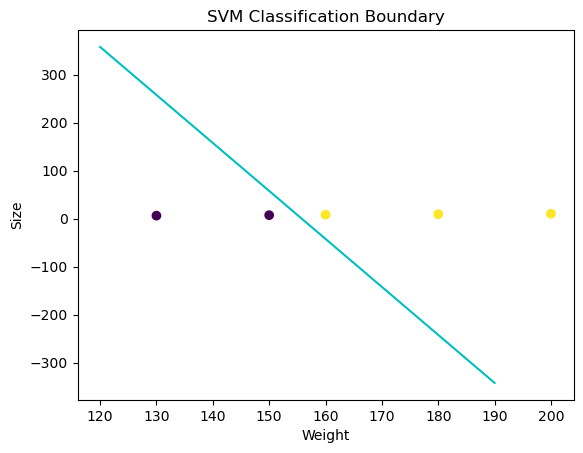

In [50]:
import numpy as np

X = np.array(X)
y = np.array(y)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y) # X[:, 0] mane sob row'r 1st column (Weight)
                                   #🔹 X[:, 1] mane sob row'r 2nd column (Size)
plt.xlabel("Weight")
plt.ylabel("Size")

# Decision boundary
w = model.coef_[0]
b = model.intercept_[0]
xpoints = np.linspace(120, 190) # x er range eta 
ypoints = -(w[0] * xpoints + b) / w[1] 
plt.plot(xpoints, ypoints, color='c')

plt.title("SVM Classification Boundary")
plt.show()


In [3]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

# Data
X = [
    [16, 3],
    [17, 3.5],
    [18, 4],
    [20, 4.5],
    [22, 6],
    [24, 6.5]
]
y = [0, 0, 0, 1, 1, 1]

# Train SVM
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Prediction
n = model.predict([[18, 3]])[0]
if n == 1:
    print("Big Penis")
else:
    print("Small Penis")




Small Penis


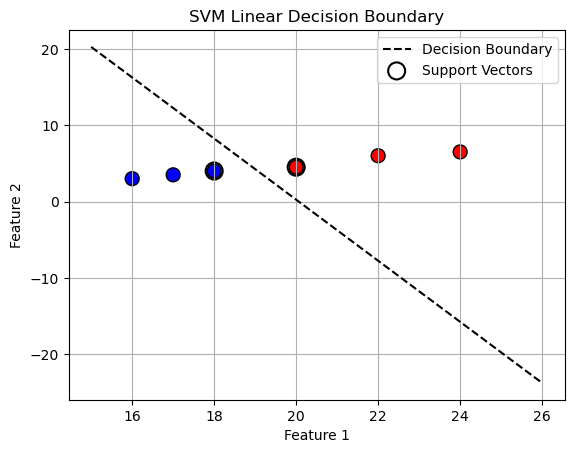

In [5]:
x = np.array(X)
y_arr = np.array(y)

# Plot data points by class
plt.scatter(x[:, 0], x[:, 1], c=y_arr, cmap='bwr', edgecolors='k', s=100)

# Decision boundary
w = model.coef_[0]
b = model.intercept_[0]

xpoints = np.linspace(15, 26, 100)
ypoints = -(w[0] * xpoints + b) / w[1]

plt.plot(xpoints, ypoints, 'k--', label='Decision Boundary')

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

# Labels and grid
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Linear Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

Step-by-Step Non-Linear SVM Example (with make_circles)

📦 Step 1: Import libraries and generate circular data

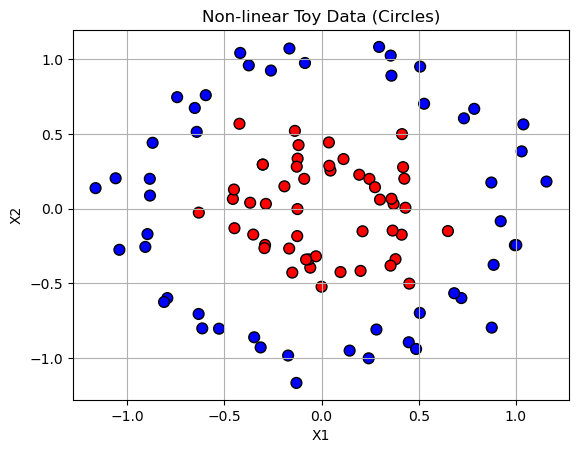

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# Make circular data (non-linear)
X, y = make_circles(n_samples=100, factor=0.4, noise=0.1, random_state=42) #factor=0.4: Ratio between outer circle and inner circle.
#noise=0.1: Adds slight randomness to make data realistic.
#X: shape = (100, 2) → 100 samples, each has 2 features (x and y coordinates).
#y: Class labels (0 or 1).

# Plot raw data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=60, edgecolors='k') #cmap='bwr': Blue for one class, Red for another.#c=y: Colors based on class label (0 or 1).
plt.title("Non-linear Toy Data (Circles)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


In [8]:
from sklearn.svm import SVC

# Create and train the model
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF = non-linear
model.fit(X, y)

#Creates a model using RBF kernel, which allows curved decision boundaries.

#C=1.0: Regularization parameter (controls margin vs accuracy trade-off).

#gamma='scale': Automatic setting for how far the effect of a point goes.


SVC()

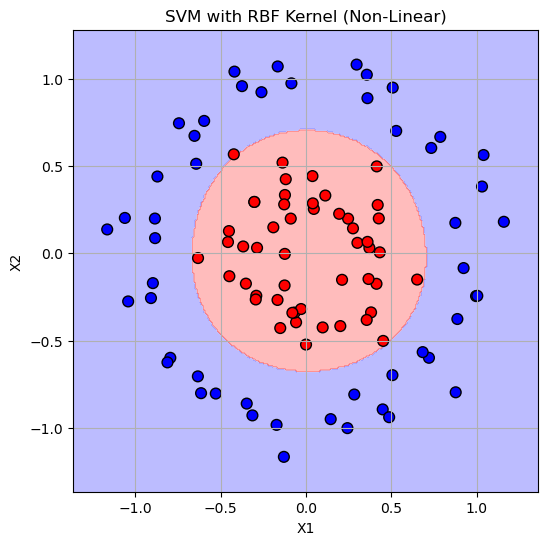

In [9]:
# Create meshgrid
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict over meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot everything
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=60, edgecolors='k')
plt.title("SVM with RBF Kernel (Non-Linear)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


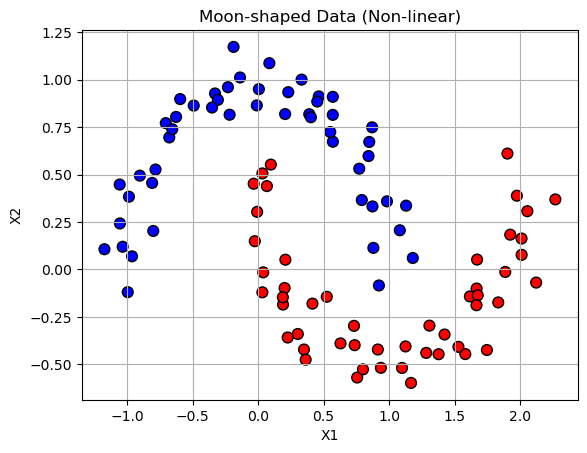

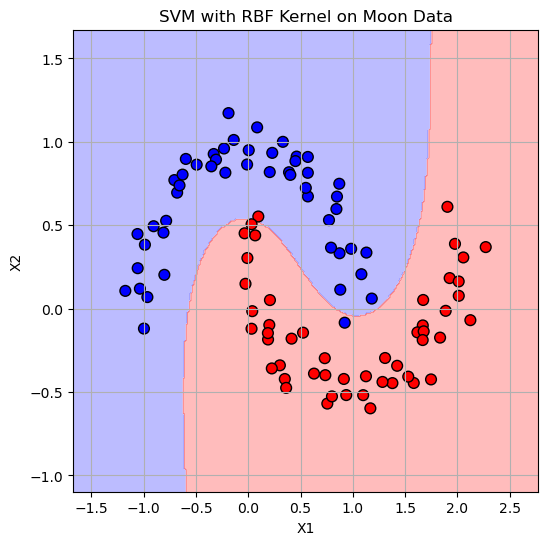

In [10]:
# Step 1: Import libraries
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate moon-shaped non-linear data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Step 3: Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=60, edgecolors='k')
plt.title("Moon-shaped Data (Non-linear)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

# Step 4: Train SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X, y)

# Step 5: Create mesh grid to visualize decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Step 6: Predict class for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 7: Plot decision boundary and data points
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=60, edgecolors='k')
plt.title("SVM with RBF Kernel on Moon Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


In [11]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for easy viewing (optional)
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Show first 5 rows
print(df.head())
print(df['target'].value_counts())  # Check class distribution


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)


SVC()

Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



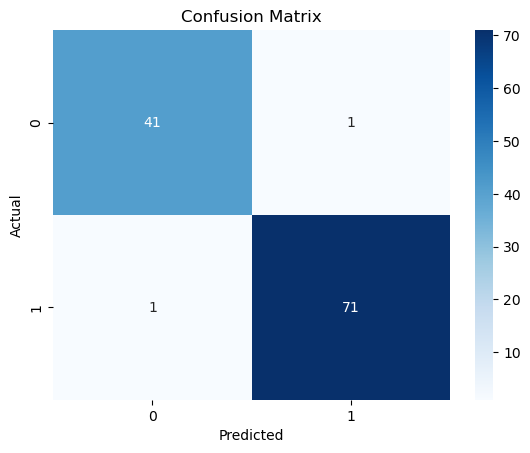

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

# Evaluate best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Tuned Accuracy: 0.9824561403508771
